# T1 - T2 Airway and Brain MRI synthetic image generation using cycle GAN

### The given code is a sample demo for brain MRI syntheic image generation from T1 to T2

### Folders and file details

Preprocessing    --> Intial set of preprocessing code. Indipendent of training module.

Configuration   ---> Contains config.py file which contrains dataset Path, Image size, buffer size, batch size

Data            ---> Contains sample data for Brain MRI in T2 and T1 weighted contrast

Helper functions --> Function for loading images 

ModelData        --> Contain GAN neural networkmodel.


In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from helperfunctions import helper
from configuration import config
from numpy import vstack
from numpy import savez_compressed

### Loading data from the path and saving as numpy file

In [2]:
sys.path.append('.')
# dataset path
path = config.DATASET_PATH
# load dataset A
dataA1 = helper.load_images(path + 'trainA/')
dataAB = helper.load_images(path + 'testA/')
dataA = vstack((dataA1, dataAB))
print('Loaded dataA: ', dataA.shape)
# load dataset B
dataB1 = helper.load_images(path + 'trainB/')
dataB2 = helper.load_images(path + 'testB/')
dataB = vstack((dataB1, dataB2))
print('Loaded dataB: ', dataB.shape)
# save as compressed numpy array
filename = 'BrainMRI_T2_T1.npz'
savez_compressed(filename, dataA, dataB)
print('Saved dataset: ', filename)

Loaded dataA:  (46, 256, 256, 3)
Loaded dataB:  (43, 256, 256, 3)
Saved dataset:  BrainMRI_T2_T1.npz


### Visualizing sample T2 and T1 brain MRI data

Loaded:  (46, 256, 256, 3) (43, 256, 256, 3)


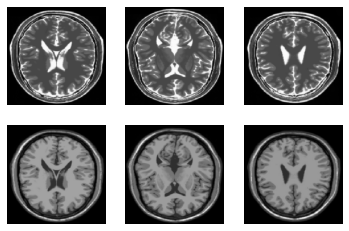

In [3]:
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('BrainMRI_T2_T1.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()

### Loading the data

In [4]:
from modelData import ganModel
from modelData.ganModel import define_generator, define_discriminator, define_composite_model, load_real_samples

# load image data
dataset = load_real_samples('BrainMRI_T2_T1.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]

Loaded (46, 256, 256, 3) (43, 256, 256, 3)


### Network Training

In [5]:
from modelData.ganModel import train

g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

>1, dA[0.579,1.076] dB[0.957,1.250] g[19.338,19.503]
>2, dA[5.295,2.010] dB[17.950,2.951] g[21.600,21.655]
>3, dA[4.165,1.365] dB[4.207,1.323] g[18.449,18.794]


KeyboardInterrupt: 